In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

# Load du lieu MNIST

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_val,y_val = X_train[50000:60000,:],y_train[50000:60000]
X_train,y_train = X_train[:50000,:],y_train[:50000]

In [4]:
print(X_train.shape)

(50000, 28, 28)


In [9]:
y_train.shape

(50000,)

## Reshape du lieu

In [10]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_val =  X_val.reshape(X_val.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

## Onehot encoding label

In [11]:
Y_train = np_utils.to_categorical(y_train,10)
Y_val = np_utils.to_categorical(y_val,10)
Y_test = np_utils.to_categorical(y_test,10)
print('Nhan ban dau = ',y_train[0])
print('Nhan sau One hot Encoding = ',Y_train[0])

Nhan ban dau =  5
Nhan sau One hot Encoding =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Model Define

In [12]:
model = Sequential()

## Conv2D 1

In [13]:
model.add(Conv2D(32,(3,3),activation='sigmoid',input_shape=(28,28,1)))

## Conv2D 2

In [14]:
model.add(Conv2D(32,(3,3),activation='sigmoid'))

## Max Pooling 2D

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

## Flatten nham chuyen tu tensor sang vector

In [16]:
model.add(Flatten())

## Fully Connected layer

In [18]:
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

## Final model

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               589952    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                        

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Start training

In [22]:
History = model.fit(X_train,Y_train,validation_data=(X_val,Y_val),batch_size=64,epochs=10,verbose=1)


Epoch 1/10
782/782 [==============================] - 81s 102ms/step - loss: 0.4184 - accuracy: 0.8826 - val_loss: 0.0913 - val_accuracy: 0.9781
Epoch 2/10
782/782 [==============================] - 64s 81ms/step - loss: 0.0741 - accuracy: 0.9798 - val_loss: 0.0544 - val_accuracy: 0.9867
Epoch 3/10
782/782 [==============================] - 64s 82ms/step - loss: 0.0467 - accuracy: 0.9869 - val_loss: 0.0505 - val_accuracy: 0.9853
Epoch 4/10
782/782 [==============================] - 64s 82ms/step - loss: 0.0324 - accuracy: 0.9912 - val_loss: 0.0451 - val_accuracy: 0.9863
Epoch 5/10
782/782 [==============================] - 64s 81ms/step - loss: 0.0245 - accuracy: 0.9938 - val_loss: 0.0443 - val_accuracy: 0.9872
Epoch 6/10
782/782 [==============================] - 65s 82ms/step - loss: 0.0175 - accuracy: 0.9953 - val_loss: 0.0444 - val_accuracy: 0.9872
Epoch 7/10
782/782 [==============================] - 64s 81ms/step - loss: 0.0126 - accuracy: 0.9972 - val_loss: 0.0406 - val_accuracy

AttributeError: ignored

<Figure size 640x480 with 0 Axes>

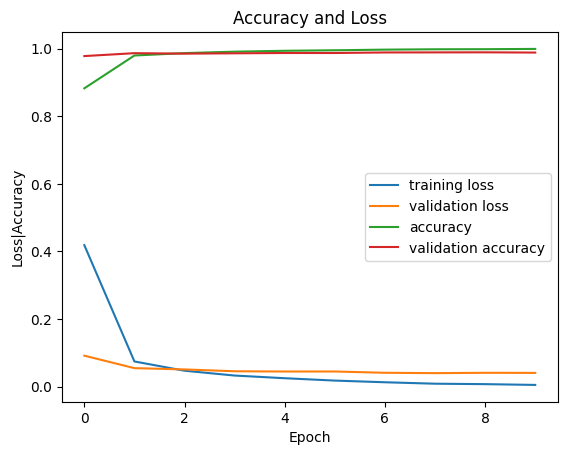

In [27]:
fig = plt.figure()
numofepoch = 10
plt.plot(np.arange(0,numofepoch),History.history['loss'],label='training loss')
plt.plot(np.arange(0,numofepoch),History.history['val_loss'],label='validation loss')
plt.plot(np.arange(0,numofepoch),History.history['accuracy'],label='accuracy')
plt.plot(np.arange(0,numofepoch),History.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

# Score the model

In [28]:
score = model.evaluate(X_test,Y_test,verbose=0)
print(score)

[0.035626281052827835, 0.9882000088691711]


In [29]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [36]:
Y_pred[0]

array([1.2438732e-08, 4.3486153e-07, 2.7253145e-07, 1.0897158e-05,
       5.2152189e-09, 8.7194012e-09, 3.4657108e-10, 9.9998766e-01,
       1.7255410e-08, 6.8624001e-07], dtype=float32)

In [42]:
# Get the index of the maximum value
y_pred = np.argmax(Y_pred, axis=1)

In [43]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [48]:
confusion_matrix(y_test, y_pred)

array([[ 978,    0,    0,    0,    0,    0,    1,    0,    0,    1],
       [   0, 1132,    1,    1,    0,    0,    0,    0,    1,    0],
       [   2,    3, 1021,    2,    1,    0,    0,    3,    0,    0],
       [   0,    0,    3,  998,    0,    7,    0,    0,    1,    1],
       [   0,    0,    0,    0,  975,    0,    3,    0,    0,    4],
       [   1,    0,    0,    4,    0,  885,    2,    0,    0,    0],
       [   2,    2,    0,    0,    1,    4,  949,    0,    0,    0],
       [   1,    3,    9,    4,    1,    0,    0, 1004,    2,    4],
       [   5,    0,    2,    1,    1,    1,    1,    2,  957,    4],
       [   0,    2,    0,    2,   12,    5,    1,    1,    3,  983]])